**1. Lecture et affichage de l'image :**

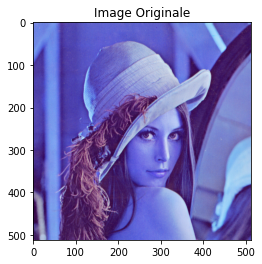

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cmath as math
import numpy
import random
import os

img2 = cv.imread("/content/lena.png")
plt.imshow(img2)
plt.title("Image Originale")
plt.show()

**2. Transformation en NG :**

(512, 512)


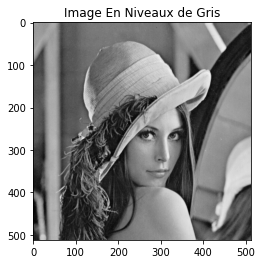

In [ ]:
img=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.title("Image En Niveaux de Gris")
plt.show()

**3. Robert :**

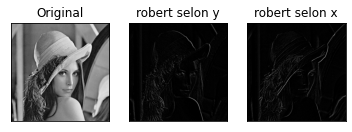

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


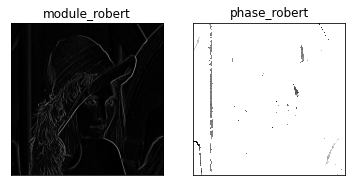

In [ ]:
kernelxr = np.array([[0,-1],[1,0]])
kernelyr = np.array([[1,0],[0,-1]])
robertx = cv.filter2D(img, -1, kernelxr)
roberty = cv.filter2D(img, -1, kernelyr)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(robertx,cmap = 'gray')
plt.title('robert selon y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(roberty,cmap = 'gray')
plt.title('robert selon x'), plt.xticks([]), plt.yticks([])
plt.show()

amp_robert_carre=np.square(robertx.astype(np.float32))+np.square(roberty.astype(np.float32))
amp_robert=np.sqrt(amp_robert_carre)
amp_robert=np.uint8(amp_robert)
phase_robert=np.arctan(roberty/robertx)
plt.subplot(1,2,1),plt.imshow(amp_robert,cmap = 'gray')
plt.title('module_robert'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(phase_robert,cmap = 'gray')
plt.title('phase_robert'), plt.xticks([]), plt.yticks([])
plt.show()

**3. Prewitt :**

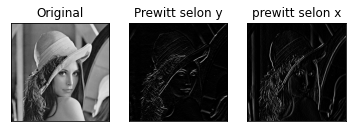

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


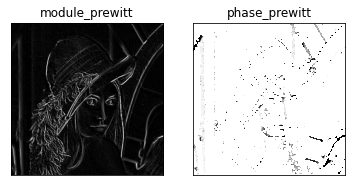

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(prewittx,cmap = 'gray')
plt.title('Prewitt selon y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(prewitty,cmap = 'gray')
plt.title('prewitt selon x'), plt.xticks([]), plt.yticks([])
plt.show()

amp_prewitt_carre=np.square(prewittx.astype(np.float32))+np.square(prewitty.astype(np.float32))
amp_prewitt=np.sqrt(amp_prewitt_carre)
amp_prewitt=np.uint8(amp_prewitt)
phase_prewitt=np.arctan(prewitty/prewittx)
plt.subplot(1,2,1),plt.imshow(amp_prewitt,cmap = 'gray')
plt.title('module_prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(phase_prewitt,cmap = 'gray')
plt.title('phase_prewitt'), plt.xticks([]), plt.yticks([])
plt.show()

**3. Sobel:**

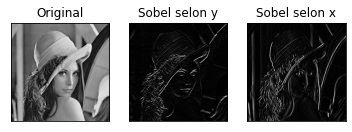

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


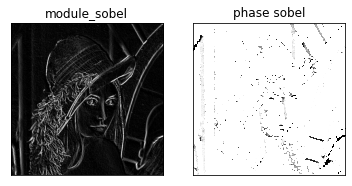

In [ ]:
kernelxs = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernelys = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelx = cv.filter2D(img, -1, kernelxs)
sobely = cv.filter2D(img, -1, kernelys)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel selon y'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel selon x'), plt.xticks([]), plt.yticks([])
plt.show()
amp_sobel_carre=np.square(sobelx.astype(np.float32))+np.square(sobely.astype(np.float32))
amp_sobel=np.sqrt(amp_sobel_carre)
amp_sobel=np.uint8(amp_sobel)
phase_sobel=np.arctan(sobely/sobelx)
plt.subplot(1,2,1),plt.imshow(amp_sobel,cmap = 'gray')
plt.title('module_sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(phase_sobel,cmap = 'gray')
plt.title('phase sobel'), plt.xticks([]), plt.yticks([])
plt.show()

**Comparaison :** 

Le filtre Sobel rend les contours plus solides que le filtre Prewitt qui les rend plus solides que le filtre Roberts.

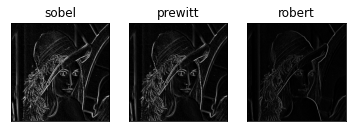

In [ ]:
plt.subplot(1,3,1),plt.imshow(amp_sobel,cmap = 'gray')
plt.title('sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(amp_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(amp_robert,cmap = 'gray')
plt.title('robert'), plt.xticks([]), plt.yticks([])
plt.show()

**4. Laplacien 4 et 8 connexités:**

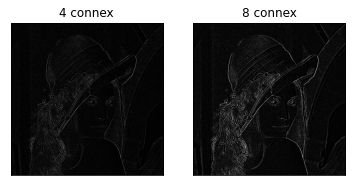

In [ ]:
kernel4 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacien4connex = cv.filter2D(img, -1, kernel4)
kernel8 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
laplacien8connex = cv.filter2D(img, -1, kernel8)

plt.subplot(1,2,1),plt.imshow(laplacien4connex,cmap = 'gray')
plt.title('4 connex'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacien8connex,cmap = 'gray')
plt.title('8 connex'), plt.xticks([]), plt.yticks([])
plt.show()

Comparaison : 

- Le Laplacien 8 connexités définit mieuc les contours.
- Par contre, e Laplacien 4 connexités rajoute moins de bruit.

**5. Appliquer un filtrage gaussien avant de calculer le Laplacien 8-connexité :**

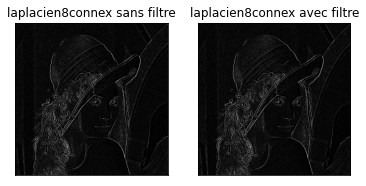

In [ ]:
blur_gauss = cv.GaussianBlur(img,(3,3),1)
laplacien_gauss_8connex = cv.filter2D(img, -1, kernel8)
plt.subplot(1,2,1),plt.imshow(laplacien8connex,cmap = 'gray')
plt.title('laplacien8connex sans filtre'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacien_gauss_8connex,cmap = 'gray')
plt.title('laplacien8connex avec filtre'), plt.xticks([]), plt.yticks([])
plt.show()

**6. Amélioration du Laplacien par seuillage :**

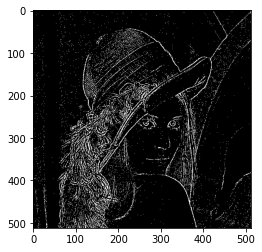

In [ ]:
th = 0
ret, Lap_blur_th = cv.threshold(laplacien8connex, th, 255, cv.THRESH_OTSU )
plt.imshow(Lap_blur_th, cmap="gray")

**7. Comparaison entre les différents filtres appliqués pour la détection de contours :**

- Sobel > Prewitt > Roberts : en terme de solidité des contours.
- Le Laplacien 8 connexités définit mieux les contours que le Laplacien 4 connexités, mais rajoute plus de bruit.
- L'application du Laplacien à l'image filtré est préférable, mais donne des contours flous, et pour régler cela, on doit appliquer un seuillage pour améliorer les resultats du Laplacien.

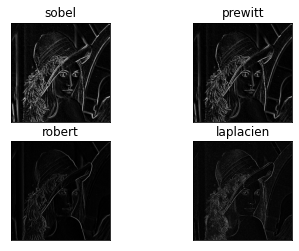

In [ ]:
plt.subplot(2,2,1),plt.imshow(amp_sobel,cmap = 'gray')
plt.title('sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(amp_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(amp_robert,cmap = 'gray')
plt.title('robert'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(laplacien_gauss_8connex,cmap = 'gray')
plt.title('laplacien'), plt.xticks([]), plt.yticks([])
plt.show()